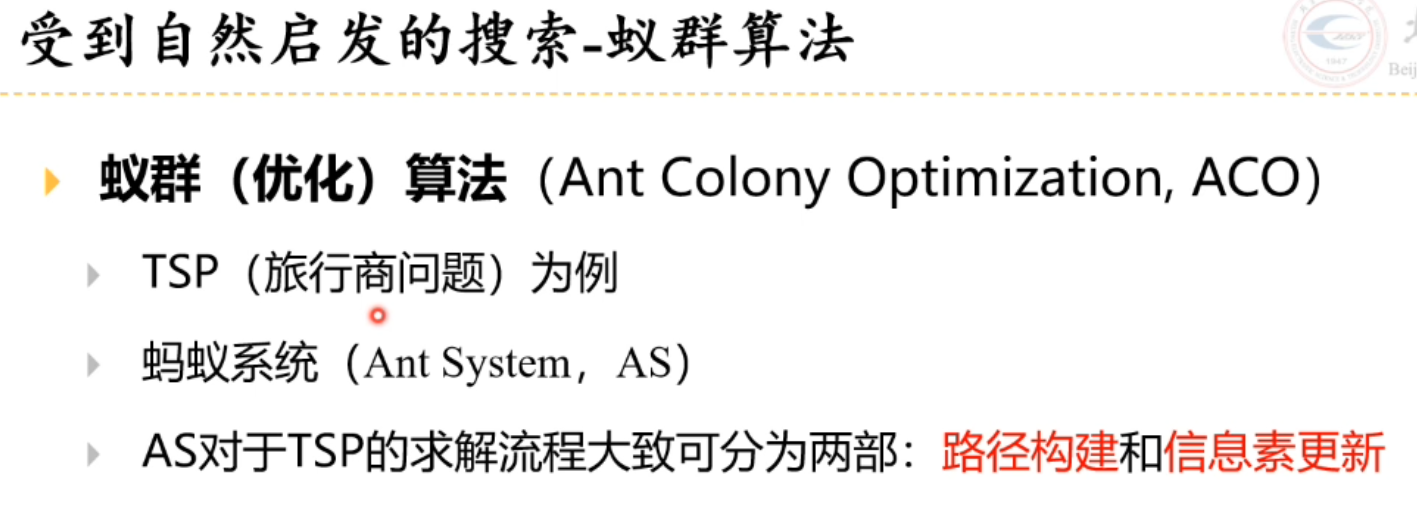

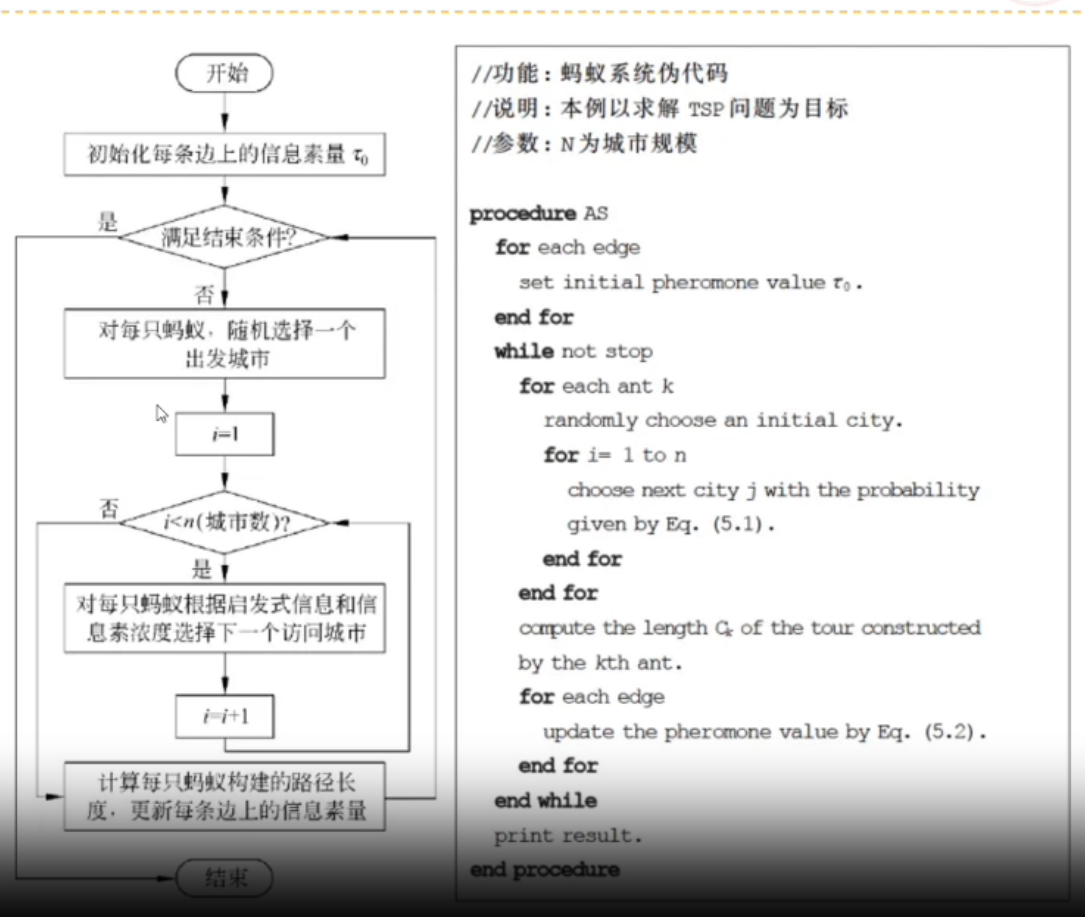

In [1]:
import random
import copy
import sys
import tkinter
import threading
import time
from functools import reduce


In [2]:

(ALPHA, BETA, RHO, Q) = (1, 2, 0.5, 100)
(city_num, ant_num) = (50, 50)
distance_x = []
distance_y = []
for i in range(city_num):
    distance_x.append(random.randint(100, 500))
    distance_y.append(random.randint(100, 500))

distance_graph = [[0 for col in range(city_num)] for row in range(city_num)]
print(distance_graph)
pheromone_graph = [[1 for col in range(city_num)] for row in range(city_num)]
print(pheromone_graph)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

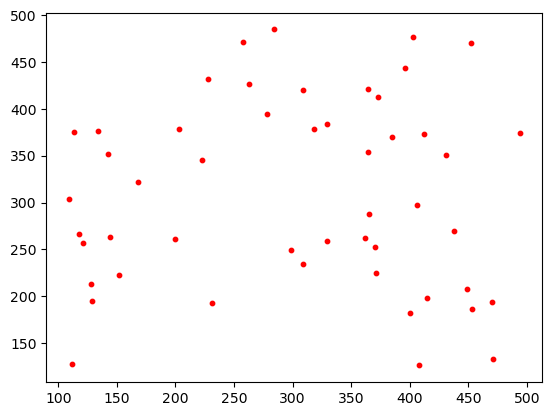

In [3]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.scatter(distance_x, distance_y, s=10, c='r', marker='o')
plt.show()

In [ ]:

class Ant():
    def __init__(self, ID):
        self.ID = ID
        self.__clean_data()

    def __clean_data(self):
        self.path = []
        self.total_distance = 0
        self.move_count = 0
        self.current_city = -1
        self.open_table_city = [True for i in range(city_num)]
        city_index = random.randint(0, city_num-1)
        self.current_city = city_index
        self.path.append(city_index)
        self.open_table_city[city_index] = False
        self.move_count = 1

    def __choice_next_city(self):
        next_city = -1
        select_citys_prob = [0 for i in range(city_num)] # 选择城市的概率
        total_prob = 0
        # 计算选择城市的概率
        for i in range(city_num):
            if self.open_table_city[i]:
                select_citys_prob[i] = pow(pheromone_graph[self.current_city][i], ALPHA) * \
                                       pow(1/distance_graph[self.current_city][i], BETA)
                total_prob += select_citys_prob[i]

        # 轮盘赌选择城市
        if total_prob > 0:
            temp_prob = random.uniform(0, total_prob)
            for i in range(city_num):
                if self.open_table_city[i]:
                    temp_prob -= select_citys_prob[i]
                    if temp_prob <= 0:
                        next_city = i
                        break

        # 顺序选择城市
        if next_city == -1:
            for i in range(city_num):
                if self.open_table_city[i]:
                    next_city = i
                    break

        if next_city == -1:
            next_city = random.randint(0, city_num-1)
            while False == self.open_table_city[next_city]:
                next_city = random.randint(0, city_num-1)

        # 返回城市序号
        return next_city
    
    def __cal_total_distance(self):
        temp_distance = 0
        for i in range(1,city_num):
            start,end = self.path[i],self.path[i-1]
            temp_distance += distance_graph[start][end]
        end = self.path[0]
        temp_distance += distance_graph[end][start]
        self.total_distance = temp_distance
        
    def __move(self,next_city):
        self.path.append(next_city)
        self.open_table_city[next_city] = False
        self.total_distance += distance_graph[self.current_city][next_city]
        self.current_city = next_city
        self.move_count += 1

    def search_path(self):
        self.__clean_data()
        while self.move_count < city_num:
            next_city = self.__choice_next_city()
            self.__move(next_city)
        self.__cal_total_distance()

class TSP():
    def __init__(self, root, width, height, n=city_num):
        self.root = root
        self.width = width
        self.height = height
        self.n = n
        self.canvas = tkinter.Canvas(root, width=500, height=500,bg="#EBEBEB",xscrollincrement=1,yscrollincrement=1)
        self.canvas.pack(expand=tkinter.YES, fill=tkinter.BOTH)
        self.title("TSP 蚁群算法(n:初始化 e:开始搜索 s:停止搜索 q:退出程序)")
        self.__r = 5
        self.__lock = threading.RLock()
        self.__bindEvents()
        self.new()

    for i in range(city_num):
        for j in range(city_num):
            temp_distance = pow(distance_x[i] - distance_x[j], 2) + pow(distance_y[i] - distance_y[j], 2)
            temp_distance = pow(temp_distance, 0.5)
            distance_graph[i][j] = temp_distance + 1e-6

    def __bindEvents(self):
        self.root.bind("q",self.quite)
        self.root.bind("n",self.new)
        self.root.bind("e",self.search_path)
        self.root.bind("s",self.stop)

    def title(self, text):
        self.root.title(text)

    def new(self, evt=None):
        # 停止线程
        self.__lock.acquire()
        self.__running = False
        self.__lock.release()
        
        self.clear()
        self.nodes = []
        self.nodes2 = []

        for i in range(len(distance_x)):
            x = distance_x[i]
            y = distance_y[i]
            self.nodes.append((x,y))
            node = self.canvas.create_oval(x-self.__r, 
                                           y-self.__r, x+self.__r, y+self.__r, 
                                           fill="#ff0000",
                                           outline="#000000", 
                                           tags="node")
            self.nodes2.append(node)
            #self.canvas.create_text(x, y-10, text="(" + str(x) + "," + str(y) + ")", fill= 'black')

        for i in range(city_num):
            for j in range(city_num):
                pheromone_graph[i][j] = 1.0
        
        self.ants = [Ant(ID) for ID in range(ant_num)]
        self.best_ant = Ant(-1)
        self.best_ant.total_distance = 1 << 31
        self.iter = 1

    def line(self,order):
        self.canvas.delete("line")

        def line2(i1,i2):
            p1,p2 = self.nodes[i1],self.nodes[i2]
            self.canvas.create_line(p1,p2,fill="#000000",tags="line")
            return i2
        reduce(line2,order,order[-1])

    def clear(self):
        for item in self.canvas.find_all():
            self.canvas.delete(item)

    def quite(self, evt=None):
        self.__lock.acquire()
        self.__running = False
        self.__lock.release()
        self.root.destroy()
        print("退出程序")
        sys.exit()

    def stop(self, evt=None):
        self.__lock.acquire()
        self.__running = False
        self.__lock.release()
        print("停止搜索")

    def search_path(self, evt=None):
        self.__lock.acquire()
        self.__running = True
        self.__lock.release()

        last_best_distance = 1 << 31
        while self.__running:
            # 遍历每一只蚂蚁f
            for ant in self.ants:
                # 选择路径
                ant.search_path()
                if ant.total_distance < self.best_ant.total_distance:
                    self.best_ant = copy.deepcopy(ant) 
            # 更新信息素
            self.__update_pheromone_graph()
            print("迭代次数:", self.iter, "最短路径长度:", self.best_ant.total_distance)
            self.line(self.best_ant.path)
            self.title("TSP 蚁群算法(n:初始化 e:开始搜索 s:停止搜索 q:退出程序) 最短路径长度:" + str(self.best_ant.total_distance) + " 迭代次数:" + str(self.iter))
            self.canvas.update()
            self.iter += 1
            if abs(self.best_ant.total_distance - last_best_distance) > 1:
                last_best_distance = self.best_ant.total_distance
                time.sleep(1)
    
    # 更新信息素
    def __update_pheromone_graph(self):
        temp_phreomone = [[0.0 for j in range(city_num)] for i in range(city_num)]
        for ant in self.ants:
            for i in range(1,city_num):
                start,end = ant.path[i-1],ant.path[i]
                temp_phreomone[start][end] += Q/ant.total_distance
                temp_phreomone[end][start] += Q/ant.total_distance

        # 更新所有城市之间的信息素
        for i in range(city_num):
            for j in range(city_num):
                pheromone_graph[i][j] = pheromone_graph[i][j] * RHO + temp_phreomone[i][j]

    def mainloop(self):
        self.root.mainloop()

    
if __name__ == '__main__':
    tsp = TSP(tkinter.Tk(), 500, 500)
    tsp.mainloop()
                    

Iteration 1/100, Best distance: 324
Iteration 2/100, Best distance: 317
Iteration 3/100, Best distance: 285
Iteration 4/100, Best distance: 285
Iteration 5/100, Best distance: 285
Iteration 6/100, Best distance: 285
Iteration 7/100, Best distance: 285
Iteration 8/100, Best distance: 285
Iteration 9/100, Best distance: 285
Iteration 10/100, Best distance: 285
Iteration 11/100, Best distance: 285
Iteration 12/100, Best distance: 285
Iteration 13/100, Best distance: 285
Iteration 14/100, Best distance: 285
Iteration 15/100, Best distance: 285
Iteration 16/100, Best distance: 285
Iteration 17/100, Best distance: 285
Iteration 18/100, Best distance: 285
Iteration 19/100, Best distance: 285
Iteration 20/100, Best distance: 285
Iteration 21/100, Best distance: 285
Iteration 22/100, Best distance: 285
Iteration 23/100, Best distance: 285
Iteration 24/100, Best distance: 285
Iteration 25/100, Best distance: 285
Iteration 26/100, Best distance: 285
Iteration 27/100, Best distance: 285
Iteration 

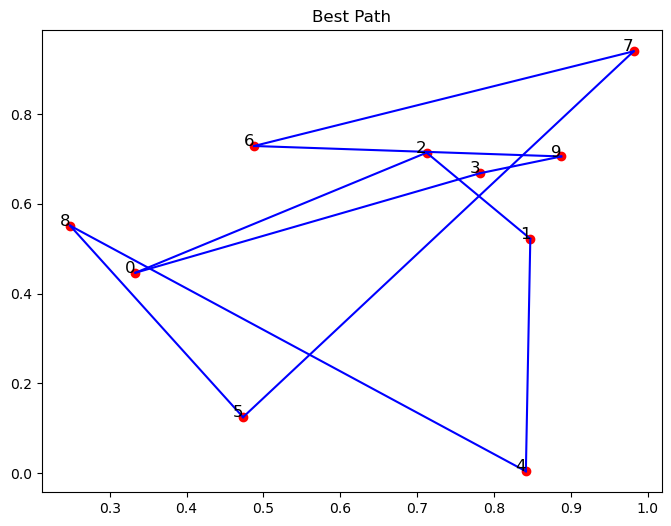

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, n_cities, distance_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=2):
        self.n_cities = n_cities
        self.distance_matrix = distance_matrix
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones((n_cities, n_cities))  # 初始化信息素
        self.best_path = None
        self.best_distance = float('inf')

    def run(self):
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths)
            shortest_path, shortest_distance = self.get_best_path(all_paths)
            if shortest_distance < self.best_distance:
                self.best_path = shortest_path
                self.best_distance = shortest_distance
            self.pheromone *= self.decay  # 信息素衰减
            print(f"Iteration {i+1}/{self.n_iterations}, Best distance: {self.best_distance}")
        return self.best_path, self.best_distance

    def gen_path(self):
        path = [random.randint(0, self.n_cities - 1)]  # 随机选择一个城市作为起点
        visited = set(path)
        while len(path) < self.n_cities:
            current_city = path[-1]
            next_city = self.pick_next_city(current_city, visited)
            path.append(next_city)
            visited.add(next_city)
        return path

    def gen_all_paths(self):
        return [self.gen_path() for _ in range(self.n_ants)]

    def pick_next_city(self, current_city, visited):
        probabilities = []
        for next_city in range(self.n_cities):
            if next_city not in visited:
                pheromone = self.pheromone[current_city][next_city] ** self.alpha
                distance = self.distance_matrix[current_city][next_city] ** self.beta
                probabilities.append(pheromone / distance)
            else:
                probabilities.append(0)
        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]
        return np.random.choice(range(self.n_cities), p=probabilities)

    def spread_pheronome(self, all_paths):
        self.pheromone *= self.decay  # 信息素衰减
        for path in all_paths:
            path_length = self.calculate_path_length(path)
            for i in range(len(path) - 1):
                self.pheromone[path[i]][path[i+1]] += 1 / path_length

    def calculate_path_length(self, path):
        length = 0
        for i in range(len(path) - 1):
            length += self.distance_matrix[path[i]][path[i+1]]
        length += self.distance_matrix[path[-1]][path[0]]  # 回到起点
        return length

    def get_best_path(self, all_paths):
        best_path = None
        best_distance = float('inf')
        for path in all_paths:
            path_length = self.calculate_path_length(path)
            if path_length < best_distance:
                best_path = path
                best_distance = path_length
        return best_path, best_distance


# 示例数据：10个城市，距离矩阵
n_cities = 10
distance_matrix = np.random.randint(10, 100, size=(n_cities, n_cities))
np.fill_diagonal(distance_matrix, 0)  # 对角线设置为0

# 初始化蚁群算法
ant_colony = AntColony(
    n_cities=n_cities,
    distance_matrix=distance_matrix,
    n_ants=50,
    n_best=10,
    n_iterations=100,
    decay=0.95,
    alpha=1,
    beta=2
)

# 运行蚁群算法
best_path, best_distance = ant_colony.run()
print("Best Path:", best_path)
print("Best Distance:", best_distance)

# 可视化结果
def plot_path(path, distance_matrix):
    plt.figure(figsize=(8, 6))
    x = np.random.rand(len(path))
    y = np.random.rand(len(path))
    plt.scatter(x, y, c='red')
    for i, city in enumerate(path):
        plt.text(x[i], y[i], str(city), fontsize=12, ha='right')

    for i in range(len(path) - 1):
        plt.plot([x[path[i]], x[path[i+1]]], [y[path[i]], y[path[i+1]]], 'b-')

    plt.plot([x[path[-1]], x[path[0]]], [y[path[-1]], y[path[0]]], 'b-')
    plt.title("Best Path")
    plt.show()

plot_path(best_path, distance_matrix)